# Machine Learning Project 1 Question 5
## Parsa Daghigh
## Student Number: 810101419
### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Load the Data

In [2]:
data = pd.read_csv("../Datasets/Income.csv")

## **EDA**

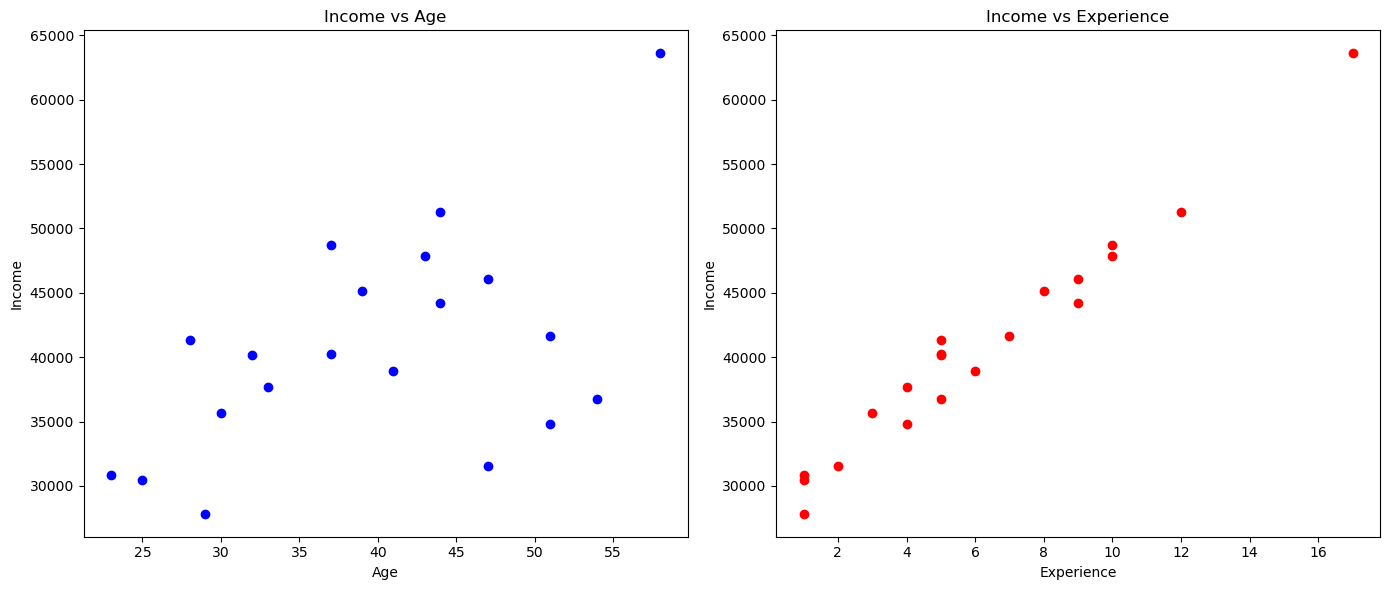

In [3]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['age'], data['income'], color='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age')

plt.subplot(1, 2, 2)
plt.scatter(data['experience'], data['income'], color='red')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.title('Income vs Experience')

plt.tight_layout()
plt.show()


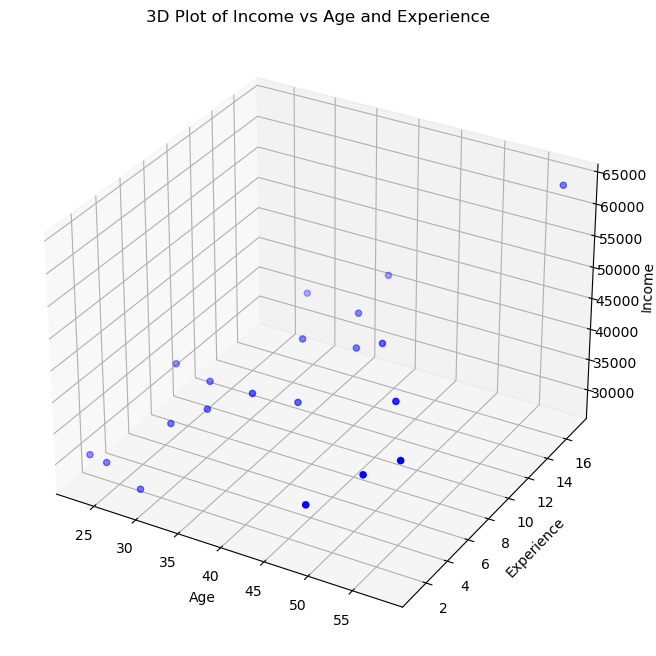

In [4]:
# Creating a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['age'], data['experience'], data['income'], c='b', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
ax.set_title('3D Plot of Income vs Age and Experience')

plt.show()


As we can see from the plots the affect of experience is so much more important than age. I mean when the experience increases the income increases as well. But the relationship between age and income is not like that. And we can see that no matter what our age is there are no rules to predict the income, there might be just a small affect by the age in the income.

## **Preprocessing**

### Normalization
Normalization rescales the values of the dataset to a range of [0, 1] or [-1, 1]. This process is particularly useful when the data does not follow a normal distribution. The formula for normalization is:<br>
$X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$<br>
<br>
### Standardization

Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This process is particularly useful for datasets that follow a normal distribution. The formula for standardization is:<br>
${\text{std}} = \frac{X - \mu}{\sigma}$<br>
$\mu$ is the mean of the data.<br>
$\sigma$ is the standard deviation of the data.<br>

In [5]:
# Normalize the data
data['age'] = (data['age'] - data['age'].mean()) / data['age'].std()
data['experience'] = (data['experience'] - data['experience'].mean()) / data['experience'].std()
data['income'] = (data['income'] - data['income'].mean()) / data['income'].std()
data.head()

,age,experience,income
0,-1.460950,-1.260795,-1.218690
1,-0.962332,-0.775874,-0.600192
2,0.732968,-1.018334,-1.084801
3,-0.762885,-0.290953,-0.071743
4,0.334074,0.921350,0.840601


## **Implementation**

#### Linear Regression with Gradient Descent
$\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$<br>
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$<br>

Theta (parameters): [[ 2.70616862e-17]
 [-1.17858717e-01]
 [ 1.05672922e+00]]


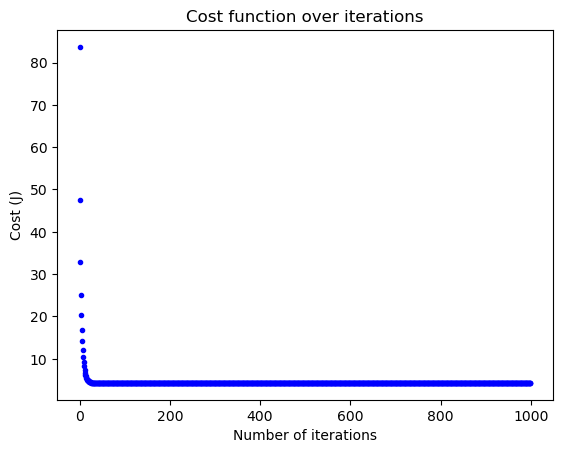

In [6]:
# Adding intercept term (bios)
data.insert(0, 'Ones', 1)

X = data[['Ones', 'age', 'experience']]
y = data['income']

X = np.array(X)
y = np.array(y).reshape(-1, 1)

theta = np.zeros((3, 1))
alpha = 0.3
iterations = 1000

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

print(f"Theta (parameters): {theta}")

# Plot the cost history
plt.plot(range(len(cost_history)), cost_history, 'b.')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost function over iterations')
plt.show()


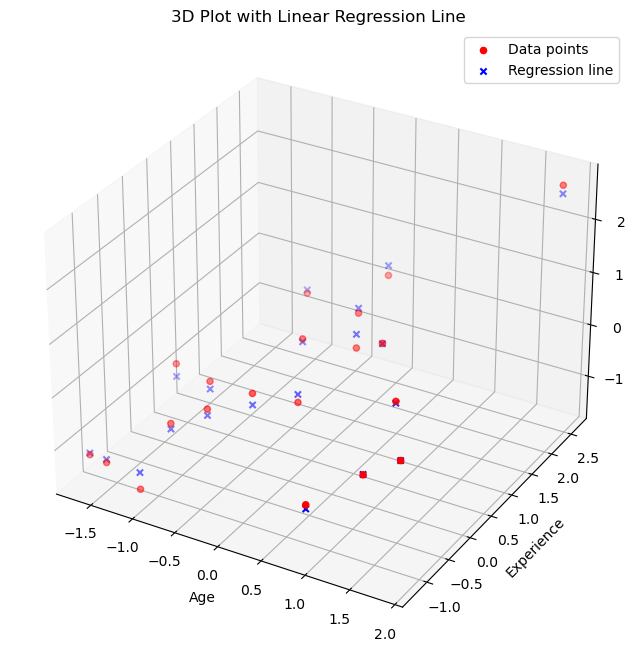

In [7]:
predictions = X.dot(theta)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['age'], data['experience'], data['income'], c='r', marker='o', label='Data points')
ax.scatter(data['age'], data['experience'], predictions, c='b', marker='x', label='Regression line')
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
ax.set_title('3D Plot with Linear Regression Line')
plt.legend()
plt.show()


In [8]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

predictions = X.dot(theta)
mse = mean_squared_error(y, predictions)

print(f"MSE: {mse}")


MSE: 0.02153067553282429


### Normal Equations
$\theta = (X^T X)^{-1} X^T y$

In [9]:
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
predictions_normal = X.dot(theta_normal)
mse_normal = mean_squared_error(y, predictions_normal)

print(f"Theta (normal equations): {theta_normal}")
print(f"MSE (normal equations): {mse_normal}")


Theta (normal equations): [[ 2.77555756e-17]
 [-1.17858717e-01]
 [ 1.05672922e+00]]
MSE (normal equations): 0.021530675532824305


Results show that the MSE in Gradient Descent is around 0.021 similar to normal equations. It means that Gradient Descent reaches the best answer which is almost equal to Normal Equations. The first method has converged ans that's the reason that we have this similarity.